In [1]:
using Causality, IntervalUnionArithmetic

┌ Info: Precompiling Causality [943c2df0-3341-4665-8895-8aff0dd63d80]
└ @ Base loading.jl:1423
  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **



In [2]:
T, N = 20.0, 50
ρ = 5/N
G = Causality.makeGNP(N,ρ)

{50, 202} directed sparse Int64 graph
⠀⠀⠐⠂⠁⠀⠀⡀⠐⠀⠈⡀⠀⢀⠠⠄⠀⠀⠀⠀⢀⠄⡀⠀⠠
⠰⠀⢀⠐⢀⠐⠀⠈⠀⡁⠀⠡⢀⠀⠀⠀⠠⠀⠀⠠⡀⠀⠁⠂⠀
⠁⠀⢀⠐⠠⠂⠀⠀⢀⢐⠀⠀⠀⠀⠖⠀⠀⢀⠀⠠⠀⠀⡀⠔⠀
⠀⠠⡀⠀⠀⠀⠀⠀⠀⠀⡀⠒⠀⠃⠀⠀⠀⠀⠀⠀⠠⠀⠀⠠⢁
⠐⠀⠄⠠⢀⢐⠀⠀⠀⠀⠠⠁⠀⡂⠀⠀⠀⠀⠀⠐⢈⠀⠁⠀⠈
⠂⠠⠄⡀⠀⠀⢠⠈⠄⠂⢀⠐⢨⠀⠀⢀⠀⠈⡂⠄⠀⠐⢀⢀⢀
⠀⢀⠀⠐⠀⠀⠤⠀⠠⠠⠂⠒⠀⠀⠔⠌⠁⠘⠀⠀⠈⠈⠐⠀⠀
⠀⠆⠀⠀⠘⠁⠀⠀⠀⠀⠀⢀⡐⠅⠀⡠⠀⠀⠐⠄⠅⠀⠀⠈⠒
⠀⠀⠀⠂⠀⢀⠀⠀⠀⠀⡀⠀⣁⠀⠀⠀⠀⠀⠀⠉⠀⠀⡀⢀⠠
⠀⠀⠀⡀⠀⡀⠀⠀⢀⠀⠈⠌⠀⠀⠐⠄⡄⠀⠀⠀⠰⠐⠀⠁⠈
⠀⠔⠀⠈⠀⠀⠀⠂⠂⠐⢀⠀⡂⠀⠁⠁⠀⠀⢐⠂⠀⠀⠀⠀⠀
⠀⠈⠡⠀⢀⠌⠀⡀⠁⠀⠀⢐⠐⠀⡀⠀⠀⢈⠄⠀⠀⠀⠀⠀⡐
⠀⠂⠀⠀⠀⠀⠁⠐⠂⠀⠀⠐⠀⠀⠘⠀⠀⠂⠂⠀⠀⠀⠐⠈⠀

In [3]:
getpargen(inf_out::GaussianRate, lat_gen::GaussianRate, rec_gen::GaussianRate) = 
    [inf_out.a inf_out.b inf_out.c lat_gen.a lat_gen.b lat_gen.c rec_gen.a rec_gen.b rec_gen.c]


getpar(pseed,autoinf::GaussianRate,inf_in::GaussianRate, latency::GaussianRate, recov::GaussianRate) = 
    [fill(pseed, 1, N);
     fill(autoinf.a, 1, N); fill(autoinf.b, 1, N); fill(autoinf.c, 1, N);
     fill(inf_in.a,   1, N); fill(inf_in.b, 1, N); fill(inf_in.c, 1, N);
     fill(latency.a, 1, N); fill(latency.b, 1, N); fill(latency.c, 1, N);
     fill(recov.a, 1, N); fill(recov.b, 1, N); fill(recov.c, 1, N)
    ]

getpar (generic function with 1 method)

In [4]:
#Initialize generation parameters
ε = 1e-10
λ = 0.6
pseed = 10/N 
autoinf = GaussianRate(ε, T/2, 1/ε)
inf_in = GaussianRate(1.0, T/2, 1/ε)
latency = GaussianRate(1., T/2, 1/ε)
recov = GaussianRate(1., T/2, 1/ε)

inf_out = GaussianRate(λ, 4., 3.)
l_delay = GaussianRate(0.8, 2., 3.)
r_delay = GaussianRate(0.1, 6., 4.)

θp = getpar(pseed, autoinf, inf_in, latency, recov);
θpgen = getpargen(inf_out, l_delay, r_delay);

In [5]:
θpgen

1×9 Matrix{Float64}:
 0.6  4.0  3.0  0.8  2.0  3.0  0.1  6.0  4.0

In [6]:
#Initialize min/max boundaies
pseed_min = ε
pseed_max = 1-ε
rate_min = GaussianRate(ε  ,  -T,   ε)
rate_max = GaussianRate(1/ε  ,  2T,   1/ε)

θmin = getpar(pseed_min , rate_min, rate_min, rate_min, rate_min);
θmax = getpar(pseed_max , rate_max, rate_max, rate_max, rate_max);

rate_min = GaussianRate(ε  ,  -T,   ε)
rate_max = GaussianRate(3.  ,  T,   T)

θgenmin = getpargen(rate_min, rate_min, rate_min);
θgenmax = getpargen(rate_max, rate_max, rate_max);

In [7]:
const I = InferentialSEIR{GaussianRate,GaussianRate,GaussianRate,GaussianRate,GaussianRate,GaussianRate,GaussianRate}

InferentialSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate}

In [8]:
Mp = StochasticModel(I, T, θp, G, θpgen);
sample! = Sampler(Mp);

In [10]:
xtrue = zeros(N,3)
sample!(xtrue)
nobs, p = 50, 1e-6
O = [(ti = T*(1+rand())/2; (i,xtrue[i,2] < ti < xtrue[i,3],ti,p)) for i=1:nobs]

50-element Vector{Tuple{Int64, Bool, Float64, Float64}}:
 (1, 0, 18.457156115532975, 1.0e-6)
 (2, 0, 16.869421139992813, 1.0e-6)
 (3, 0, 16.35943846829765, 1.0e-6)
 (4, 0, 14.772708381996482, 1.0e-6)
 (5, 0, 16.36264657298184, 1.0e-6)
 (6, 0, 17.654039803810427, 1.0e-6)
 (7, 0, 19.78741059804193, 1.0e-6)
 (8, 0, 18.752008986701505, 1.0e-6)
 (9, 0, 10.863098856648886, 1.0e-6)
 (10, 0, 19.834563123946896, 1.0e-6)
 (11, 0, 18.915422380173524, 1.0e-6)
 (12, 0, 12.930591950281464, 1.0e-6)
 (13, 0, 11.825879199238273, 1.0e-6)
 ⋮
 (39, 0, 19.8721327830478, 1.0e-6)
 (40, 0, 18.543154939452762, 1.0e-6)
 (41, 0, 19.567308674470475, 1.0e-6)
 (42, 0, 10.437537195127113, 1.0e-6)
 (43, 0, 11.863139658068016, 1.0e-6)
 (44, 0, 18.217968802892454, 1.0e-6)
 (45, 0, 18.757905657751817, 1.0e-6)
 (46, 0, 16.6417690560202, 1.0e-6)
 (47, 0, 18.193408883480156, 1.0e-6)
 (48, 0, 12.852274412799979, 1.0e-6)
 (49, 0, 15.41460636800404, 1.0e-6)
 (50, 0, 19.067032666145206, 1.0e-6)

In [11]:
#Initialize softened model
T = Float64(T)
ε = 2e-3

inf_out = GaussianRate(0.1, 7., 6.)
l_delay = GaussianRate(1/2, 7., 5.)
r_delay = GaussianRate(1/2, 4., 4.)

autoinf = GaussianRate(ε, T/2, 1/ε)

θp2gen = getpargen(inf_out, l_delay, r_delay);
θp2 = getpar(pseed, autoinf, inf_in, latency, recov);
Mp2 = StochasticModel(I, T, θp2, G, θpgen);

In [12]:
θpgen

1×9 Matrix{Float64}:
 0.6  4.0  3.0  0.8  2.0  3.0  0.1  6.0  4.0

In [13]:
θp2gen

1×9 Matrix{Float64}:
 0.1  7.0  6.0  0.5  7.0  5.0  0.5  4.0  4.0

In [14]:
#Initialize the parameters to learn

autoinf = GaussianRate(1/N, T/2, 2T)
inf_in = GaussianRate(1.0, T/2, 2T)
latency = GaussianRate(1., T/2, 2T)
recov = GaussianRate(1., T/2, 2T)


θ = getpar(pseed, autoinf, inf_in,  latency, recov);
M = StochasticModel(I, T, θp2, G, θpgen);

In [15]:
using ProgressMeter
ProgressMeter.ijulia_behavior(:clear)
descend!(Mp2, O; M=M, numsamples=1000, numiters=200, 
         θmin=θmin, θmax=θmax,θgenmin=θgenmin, θgenmax=θgenmax, descender=SignDescender(0.),
         hyperdescender=SignDescender(0.01),learnhyper=1);
#descend!(Mp2, O; M=M, numsamples=1000, numiters=100, 
 #        θmin=θmin, θmax=θmax,θgenmin=θgenmin, θgenmax=θgenmax, descender=SignDescender(0.03));

LoadError: TaskFailedException

[91m    nested task error: [39mMethodError: no method matching logO(::Matrix{Float64}, ::Vector{Tuple{Int64, Bool, Float64, Float64}}, ::StochasticModel{InferentialSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate}, IndexedGraphs.IndexedBiDiGraph{Int64}, Vector{UnitRate}})
    [0mClosest candidates are:
    [0m  logO(::Any, ::Any, [91m::StochasticModel{<:Causality.IndividualSI}[39m) at ~/src/Causality/src/si.jl:90
    [0m  logO(::Any, ::Any, [91m::StochasticModel{<:Causality.IndividualSEIR}[39m) at ~/src/Causality/src/seir.jl:127
    Stacktrace:
     [1] [0m[1mmacro expansion[22m
    [90m   @ [39m[90m~/src/Causality/src/[39m[90m[4mvariation.jl:51[24m[39m[90m [inlined][39m
     [2] [0m[1m(::Causality.var"#14#threadsfor_fun#24"{StochasticModel{InferentialSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate}, IndexedGraphs.IndexedBiDiGraph{Int64}, Vector{UnitRate}}, Int64, StochasticModel{InferentialSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate}, IndexedGraphs.IndexedBiDiGraph{Int64}, Vector{UnitRate}}, Vector{Tuple{Int64, Bool, Float64, Float64}}, Matrix{Float64}, Vector{Causality.var"#sample!#42"{StochasticModel{InferentialSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate}, IndexedGraphs.IndexedBiDiGraph{Int64}, Vector{UnitRate}}, Causality.var"#updateQ!#41"{StochasticModel{InferentialSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate}, IndexedGraphs.IndexedBiDiGraph{Int64}, Vector{UnitRate}}, TrackingHeaps.TrackingHeap{Int64, Float64, 2, TrackingHeaps.MinHeapOrder, TrackingHeaps.NoTrainingWheels}}, TrackingHeaps.TrackingHeap{Int64, Float64, 2, TrackingHeaps.MinHeapOrder, TrackingHeaps.NoTrainingWheels}, Vector{Int64}, Int64}}, Vector{Float64}, Vector{Matrix{Float64}}, Vector{Matrix{Float64}}, Vector{Matrix{Float64}}, Vector{Matrix{Float64}}, Vector{Matrix{Float64}}, UnitRange{Int64}})[22m[0m[1m([22m[90monethread[39m::[0mBool[0m[1m)[22m
    [90m   @ [39m[35mCausality[39m [90m./[39m[90m[4mthreadingconstructs.jl:85[24m[39m
     [3] [0m[1m(::Causality.var"#14#threadsfor_fun#24"{StochasticModel{InferentialSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate}, IndexedGraphs.IndexedBiDiGraph{Int64}, Vector{UnitRate}}, Int64, StochasticModel{InferentialSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate}, IndexedGraphs.IndexedBiDiGraph{Int64}, Vector{UnitRate}}, Vector{Tuple{Int64, Bool, Float64, Float64}}, Matrix{Float64}, Vector{Causality.var"#sample!#42"{StochasticModel{InferentialSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate}, IndexedGraphs.IndexedBiDiGraph{Int64}, Vector{UnitRate}}, Causality.var"#updateQ!#41"{StochasticModel{InferentialSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate}, IndexedGraphs.IndexedBiDiGraph{Int64}, Vector{UnitRate}}, TrackingHeaps.TrackingHeap{Int64, Float64, 2, TrackingHeaps.MinHeapOrder, TrackingHeaps.NoTrainingWheels}}, TrackingHeaps.TrackingHeap{Int64, Float64, 2, TrackingHeaps.MinHeapOrder, TrackingHeaps.NoTrainingWheels}, Vector{Int64}, Int64}}, Vector{Float64}, Vector{Matrix{Float64}}, Vector{Matrix{Float64}}, Vector{Matrix{Float64}}, Vector{Matrix{Float64}}, Vector{Matrix{Float64}}, UnitRange{Int64}})[22m[0m[1m([22m[0m[1m)[22m
    [90m   @ [39m[35mCausality[39m [90m./[39m[90m[4mthreadingconstructs.jl:52[24m[39m

In [16]:
println(round.(θp2gen,digits=4))

[0.1 7.0 6.0 0.5 7.0 5.0 0.5 4.0 4.0]


In [17]:
println(round.(θpgen,digits=3))

[0.6 4.0 3.0 0.8 2.0 3.0 0.1 6.0 4.0]


In [18]:
θpgen

1×9 Matrix{Float64}:
 0.6  4.0  3.0  0.8  2.0  3.0  0.1  6.0  4.0

In [19]:
θ

13×50 Matrix{Float64}:
  0.2    0.2    0.2    0.2    0.2   …   0.2    0.2    0.2    0.2    0.2
  0.02   0.02   0.02   0.02   0.02      0.02   0.02   0.02   0.02   0.02
 10.0   10.0   10.0   10.0   10.0      10.0   10.0   10.0   10.0   10.0
 40.0   40.0   40.0   40.0   40.0      40.0   40.0   40.0   40.0   40.0
  1.0    1.0    1.0    1.0    1.0       1.0    1.0    1.0    1.0    1.0
 10.0   10.0   10.0   10.0   10.0   …  10.0   10.0   10.0   10.0   10.0
 40.0   40.0   40.0   40.0   40.0      40.0   40.0   40.0   40.0   40.0
  1.0    1.0    1.0    1.0    1.0       1.0    1.0    1.0    1.0    1.0
 10.0   10.0   10.0   10.0   10.0      10.0   10.0   10.0   10.0   10.0
 40.0   40.0   40.0   40.0   40.0      40.0   40.0   40.0   40.0   40.0
  1.0    1.0    1.0    1.0    1.0   …   1.0    1.0    1.0    1.0    1.0
 10.0   10.0   10.0   10.0   10.0      10.0   10.0   10.0   10.0   10.0
 40.0   40.0   40.0   40.0   40.0      40.0   40.0   40.0   40.0   40.0

In [20]:
function histo(v; bins=20, up=1.0)
    h = zeros(bins+1)
    z = length(v)
    for x in v
        h[floor(Int, x*bins/up)+1]+=1/z
    end
    h
end

histo (generic function with 1 method)

In [21]:
stats = post(Mp, O, numsamples=10000);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


In [22]:
statscau = prior(M);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


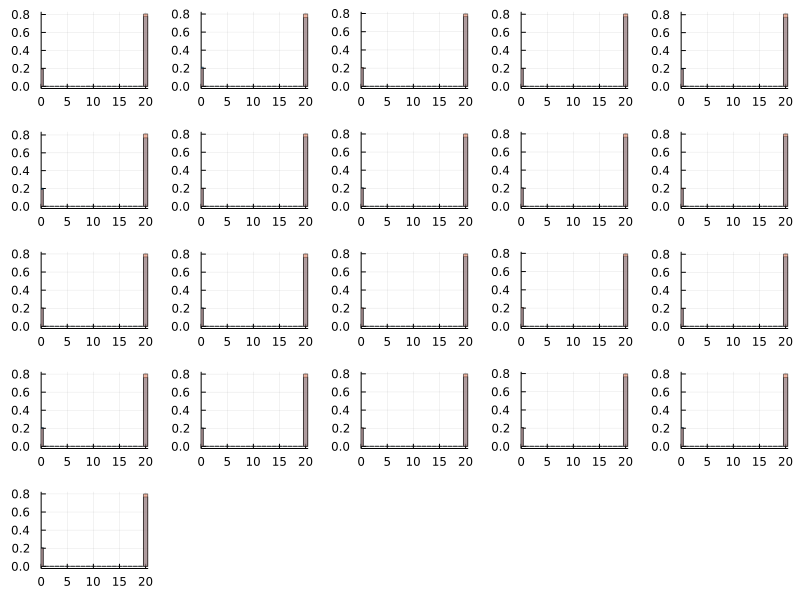

In [23]:
using Plots
state = 1
pl = map(1:21) do k
    p = plot()
    bar!(p, 0:M.T/20:M.T, histo((@view statscau[:, k, state]), up=M.T), alpha=0.5, xlims=(0,M.T+0.5), bins=20, label="cau", legend=false);
    bar!(p, 0:M.T/20:M.T, histo((@view stats[:, k, state]), up=M.T),    alpha=0.5, xlims=(0,M.T+0.5), bins=20, label="true", legend=false);
end;
savefig("marginals.pdf")
plot(pl..., size=(800,600))

## Marginals and ROC curve

In [24]:
function marginal(i, t, stats)
    numsamp = size(stats,1)
    sum( stats[:,i,2] .< t .< stats[:,i,3] ) / numsamp
end

function tpr(xtrue, rank) 
    den = sum(xtrue[rank])
    if den != 0
        return cumsum(xtrue[rank]) ./ den
    else
        return ones(size(rank))
    end
end

function fpr(xtrue, rank) 
    N = size(rank,1)
    return (range(1,N,length=N) .- cumsum(xtrue[rank])) ./ (range(1,N,length=N) .- cumsum(xtrue[rank]) )[end]
end

function ROC(xtrue, p)
    N = size(xtrue,1)
    rank = sortperm(p, rev=true)
    
    return fpr(xtrue, rank) , tpr(xtrue, rank)
end

function AUROC(ROC)
    N = size(ROC[1],1) 
    AU = 0
    for t = 1:N-1
        AU += ROC[2][t] * (ROC[1][t+1] - ROC[1][t])
    end
    return AU
end

AUROC (generic function with 1 method)

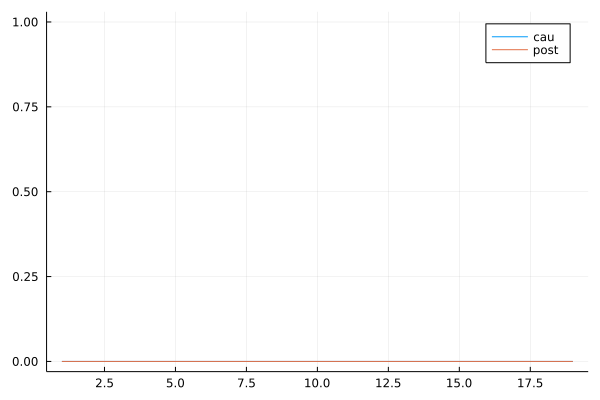

In [25]:
using Plots
p_cau = zeros(N,Int(T))
p_exact = zeros(N,Int(T))
for i = 1:N
    for t = 1:Int(T)
       p_cau[i,t] = marginal(i, t, statscau)
       p_exact[i,t] = marginal(i, t, stats)
    end
end
i = 2
plot(p_cau[i,1:end-1], label = "cau")
plot!(p_exact[i,1:end-1], label = "post")

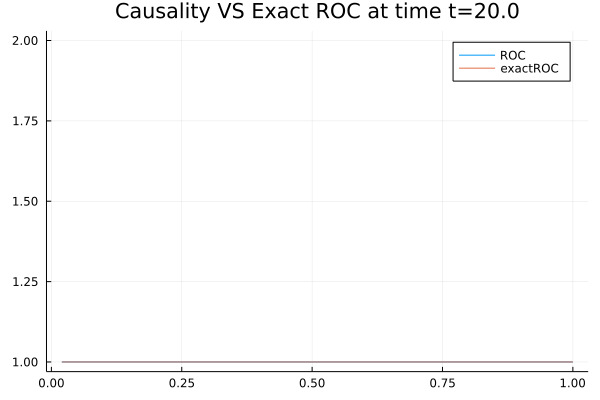

In [26]:
#Let us find the ROC of the infected individuals at time t
t = T
epidemic_risk=zeros(N)
true_risk=zeros(N)
for i=1:N
   epidemic_risk[i] = marginal(i,t,statscau)
   true_risk[i] = marginal(i,t,stats)
end
xt = xtrue[:,2] .< t-1e-3 .< xtrue[:,3]
plot(ROC(xt, epidemic_risk)[1],ROC(xt, epidemic_risk)[2], label="ROC", title="Causality VS Exact ROC at time t=$t")
plot!(ROC(xt, true_risk)[1],ROC(xt, true_risk)[2], label="exactROC")

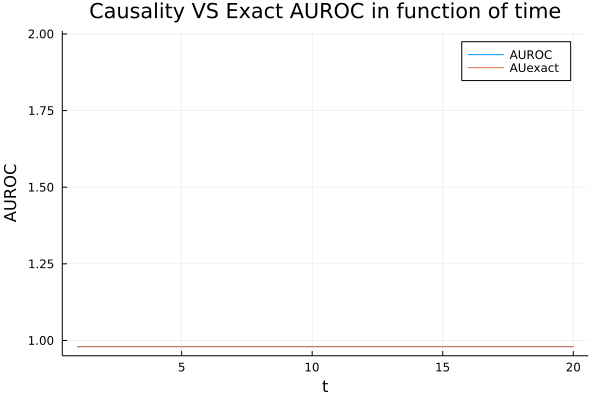

In [27]:
T = Int(T)
AU_curve=zeros(T)
AU_exact=zeros(T)
for t = 1:T
    epidemic_risk=zeros(N)
    true_risk=zeros(N)
    for i=1:N
       epidemic_risk[i] = marginal(i,t,statscau)
       true_risk[i] = marginal(i,t,stats)
    end
    xt = xtrue[:,2] .< t-1e-3 .< xtrue[:,3]
    AU_curve[t] = AUROC(ROC(xt, epidemic_risk))
    AU_exact[t] = AUROC(ROC(xt, true_risk))
end

plot(LinRange(1,T,T),AU_curve, label="AUROC", title="Causality VS Exact AUROC in function of time")
plot!(LinRange(1,T,T),AU_exact, label="AUexact")
T = Float64(T)
savefig("SEIR_AUROC.pdf")
xlabel!("t")
ylabel!("AUROC")